<img src=https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png>

### Nombre Alumno: Ramiro Silva
### Generación: G48
###  Profesor: Gianina Salomo
### Fecha : 07-08-2022

# Desafío - Regresión desde la econometría

   * Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
   * Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
   * Una vez terminado el desafío, comprime la carpeta y sube el .zip

##### En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. 

##### La base contenida en el csv Credit contiene las siguientes variables:

* Income : Ingreso anual disponible en miles de dólares.
* Limit : Límite del crédito.
* Rating : Ranking del crédito.
* Cards : Cantidad de tarjetas de credito.
* Age : Edad del usuario.
* Education : Años de educación del usuario.
* Gender : ¿Hombre o mujer?
* Student : ¿Es estudiante?
* Married : ¿Está casado?
* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* Balance : Promedio de deuda en tarjeta de crédito de usuario.

##### Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito.

##### A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

## Desafío 1: Prepare el ambiente de trabajo
#### * Importe las librerías básicas para el análisis de datos.
#### * Incluya los import base de statsmodels .
#### * Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
#### * Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .

####     * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [1]:
#pip install scipy==1.2 --upgrade

In [2]:
#pip install statsmodels --upgrade

In [3]:
#Se importan las librerias necesarias.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv('Credit.csv') # Se lee el archivo .csv

In [5]:
df.drop(columns= 'Unnamed: 0',axis = 1,inplace= True) # Se elimina la columna Unnamed

In [6]:
df.head(10) # Se vizualiza el df para ver como quedó

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [7]:
df.Ethnicity.value_counts('%')

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64

In [8]:
df.Student.value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [9]:
df.shape

(400, 11)

In [10]:
df.dtypes # con dtypes se visualiza que tipo de datos contiene cada columna.

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [11]:
categorical_columns = ['Gender', 'Student', 'Married', 'Ethnicity']

In [12]:
for cat in categorical_columns:
    print("\n",cat)
    print(df[cat].value_counts())
    print((df[cat].value_counts()/len(df[cat])))

#se genera un loop para ver los valores de las variables 


 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [13]:
# Se binarizan las variales y se agregan las columnas bin_variable al final del df.

['Gender', 'Student', 'Married', 'Ethnicity']

['Gender', 'Student', 'Married', 'Ethnicity']

In [14]:
#Generamos 2 df copias solo para probar:

df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [15]:
df2

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Una forma de hacerlo es con LabelEncoder

In [20]:
df2 = df.copy() #generamos una copia para ejemplo

#tansformo en laber encoder
encoder =  LabelEncoder()
df2['Gender_bin'] = encoder.fit_transform(df.Gender.values)
df2['Student_bin'] = encoder.fit_transform(df.Student.values)
df2['Married_bin'] = encoder.fit_transform(df.Married.values)
df2['Ethnicity_bin'] = encoder.fit_transform(df.Ethnicity.values)

#se eliminan las columnas originales porque seria información duplicada
df2.drop(columns= 'Gender',axis = 1,inplace= True)
df2.drop(columns= 'Student',axis = 1,inplace= True)
df2.drop(columns= 'Married',axis = 1,inplace= True)
df2.drop(columns= 'Ethnicity',axis = 1,inplace= True)
df2.head(10)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_bin,Student_bin,Married_bin,Ethnicity_bin
0,14.891,3606,283,2,34,11,333,0,0,1,2
1,106.025,6645,483,3,82,15,903,1,1,1,1
2,104.593,7075,514,4,71,11,580,0,0,0,1
3,148.924,9504,681,3,36,11,964,1,0,0,1
4,55.882,4897,357,2,68,16,331,0,0,1,2
5,80.180,8047,569,4,77,10,1151,0,0,0,2
6,20.996,3388,259,2,37,12,203,1,0,0,0
7,71.408,7114,512,2,87,9,872,0,0,0,1
8,15.125,3300,266,5,66,13,279,1,0,0,2
9,71.061,6819,491,3,41,19,1350,1,1,1,0


In [21]:
df2.Ethnicity_bin.value_counts()

2    199
1    102
0     99
Name: Ethnicity_bin, dtype: int64

### ¿Cómo funciona LabelEncoder?

## Otra forma de hacerlo es con OneHotEncoder

In [22]:
df4

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [23]:
from feature_engine.encoding import OneHotEncoder

ModuleNotFoundError: No module named 'feature_engine'

In [24]:
X = df4
on = OneHotEncoder()
X_on = on.fit_transform(X)
X_on

NameError: name 'OneHotEncoder' is not defined

In [25]:
df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


### ¿Cómo funciona OneHotEncoder?

In [28]:
#El OneHotEncoder realiza un mapeo de los datos que existen en una serie y crea las columnas de forma automatica,
#ejemplo para gender crearía las columnas gender_male y gender_female

# Otra forma de hacerlo es con pd.get_dummies (Binary encoding)

In [29]:
df_bin = df3.copy()
for col, dtype in df_bin.dtypes.iteritems():
    if dtype == 'O':
        dummies = pd.get_dummies(df_bin[col], prefix=col, drop_first=True)
        df_bin = pd.concat([df_bin, dummies], axis=1).drop(columns=[col])
df_bin.sample(5)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
194,30.406,2120,181,2,79,14,0,0,0,1,0,0
219,38.954,5222,370,4,76,13,653,1,0,0,0,1
142,103.893,7416,549,3,84,17,669,0,0,0,1,0
375,20.974,5673,413,5,44,16,1000,1,0,1,0,1
297,55.054,4381,321,3,74,17,188,0,0,1,1,0


### ¿Cómo funciona Binary encoding?

In [ ]:
#Binary encoding básicamente es muy parecido a OneHotEncoder pero crea la cantidad de columnas que la cantidad de posibilidades
#que tiene una serie pero menos uno. En el caso de gender crea gender_female y dependiendo del dato lo clasifica como 0 o 1.

## Otra forma de hacerlo es con np.where

In [32]:
df['bin_Gender'] = np.where(df['Gender'] == ' Male', 1, 0)
df['bin_Student'] = np.where(df['Student'] == 'Yes', 1, 0)
df['bin_Married'] = np.where(df['Married'] == 'No', 1, 0)
df['bin_Ethnicity_Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['bin_African_American'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,bin_Gender,bin_Student,bin_Married,bin_Ethnicity_Asian,bin_African_American
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,0,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,1,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,0,0,0


In [33]:
#Para evitar problemas, se eliminan las columnas originales y se dejan solo las binarizadas.
df.drop(columns= ['Gender','Student', 'Married', 'Ethnicity'], axis = 1,inplace= True)

In [34]:
df.head() #Se visualiza nuevamente el df y se verifica que se hayan eliminado las columnas correctamente.

,Income,Limit,Rating,Cards,Age,Education,Balance,bin_Gender,bin_Student,bin_Married,bin_Ethnicity_Asian,bin_African_American
0,14.891,3606,283,2,34,11,333,1,0,0,0,0
1,106.025,6645,483,3,82,15,903,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,0,1,1,0
3,148.924,9504,681,3,36,11,964,0,0,1,1,0
4,55.882,4897,357,2,68,16,331,1,0,0,0,0


## Desafío 2: Genere gráficos descriptivos para las variables contínuas

####  *  Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. 
####  *  Agrege una legenda para indicar qué representa cada línea.
####  *  ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [35]:
def plot_hist(dataframe, var):
    tmp = dataframe[var].dropna()
    plt.hist(tmp, color='grey', alpha=.4)
    plt.title(var)
    plt.axvline(np.mean(tmp), color='dodgerblue', label ="Media")
    plt.axvline(np.median(tmp), color='tomato', label = "Mediana")
    plt.gca().set(title= var, ylabel= var)
    plt.legend()
    plt.figure()

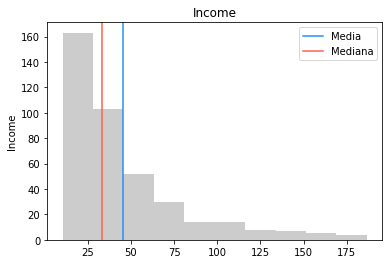

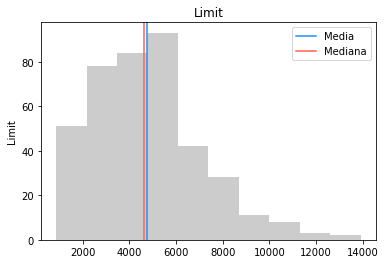

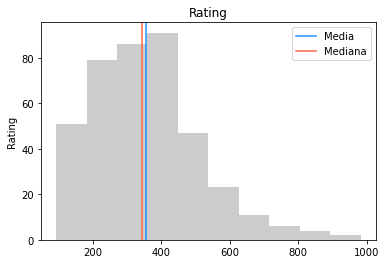

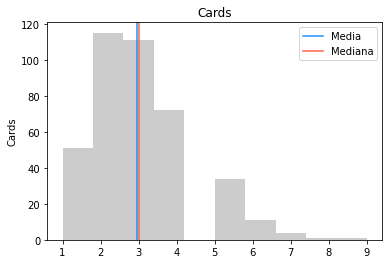

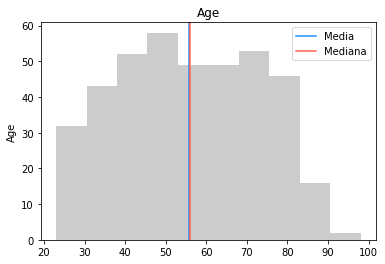

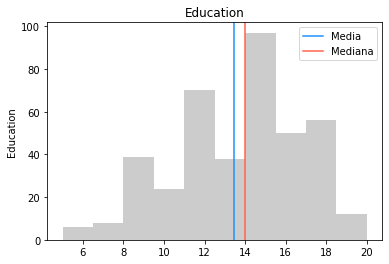

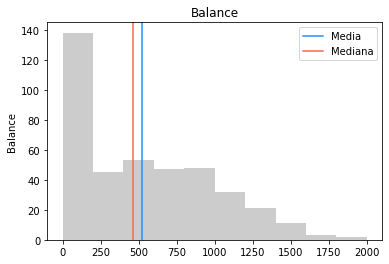

<Figure size 432x288 with 0 Axes>

In [37]:
for i in ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']:
    plot_hist(df, i)


__________________________________________________________________________________________________________________________
__COMENTARIOS__

__Income:__</font><br>
* _El gráfico muestra que la mayoria de los usuarios tienen Ingresos anuales disponibles cercanos a los UDS25.000, el promedio global ronda los USD50.000, y los ingresos anuales mas altos entre USD125.000 y USD175.000 se concentran en la menor parte de los usuarios_. Cabe destacar también que dentro de las series analizdas es la que mayor diferencia existe entre la media y la mediana, en este caso particular la media > mediana lo cual indica que hay valores grandes que en cieta forma distorsionan esta medida.

__Rating:__ </font><br>
* _Podemos ver que el promedio de Ranking del crédito es cercanos a los 300, la mayoria de los usuarios tienen un Rating entre 300 y 500._

__Cards:__ </font><br>
* _Podemos observar que la mayoría de los usuarios tienen entre 2 a 3 tarjetas de crédito, el promedio global de tarjetas es de 3, y la menor parte de los usuarios tiene sobre 5 tarjetas._

__Balance:__ </font><br> 
* _El gráfico muestra que la mayor parte de los usuarios tienen una deuda baja cercana a 0, la deuda promedio está cercana a los USD500.000,  y la minoria de los usuarios tienen las deudas más altas, por sobre los USD 1000.000._

__Age:__ </font><br> 
* _El gráfico muestra que la muestra es hetoregenea respecto a las edades ya que sus frecuencias son similares para los distintos rangos que se muestran en el histograma. Por otro lado comentar que tanto la media y la mediana se encuentran en torno a los 55 años._

__Education:__ </font><br> 
* _En education se aprecia que las personas tienen a tener en promedio 13 años de educación._

__Education:__ </font><br> 
* _Finalmente para la variable Limit se aprecia que el Limite de crédito que disponen las personas de la muestra se concentran o hay mayor frecuencia entre los 2000 y 6000. Por otro lado tanto la media como la mediana es cercana a los 4500 de limite de crédito._

## Desafío 3: Regresión Lineal Simple
#### * A continuación generaremos una serie de modelos simples:

$Balance =  \beta_{0} + \omega_{1} * Student + \epsilon$
    
$Balance =  \beta_{0} + \beta_{1} * Income + \epsilon$
        
$Balance =  \beta_{0} + \beta_{1} * Rating + \epsilon$
        
#### * Utilizando statsmodels , comente brevemente los siguientes puntos:
####    * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
####   * ¿Qué podemos decir sobre el comportamiento de Student ?
#### * ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

__$Balance =  \beta_{0} + \omega_{1} * Student + \epsilon$__

In [38]:
model_Student = smf.ols('𝐵𝑎𝑙𝑎𝑛𝑐𝑒 ~ bin_Student', df).fit()
model_Student
model_Student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                𝐵𝑎𝑙𝑎𝑛𝑐𝑒   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.49e-07
Time:                        07:49:15   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
bin_Student   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#La variable bin_student explicaría alrededor alrededor del 6.7% el promedio de deuda en tarjeta de crédito.

__$Balance =  \beta_{0} + \beta_{1} * Income + \epsilon$__

In [40]:
model_Income = smf.ols('𝐵𝑎𝑙𝑎𝑛𝑐𝑒 ~ Income', df).fit()
model_Income
model_Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                𝐵𝑎𝑙𝑎𝑛𝑐𝑒   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.03e-22
Time:                        07:53:54   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#La variable Income explicaría alrededor alrededor del 2.15% el promedio de deuda en tarjeta de crédito.

$Balance =  \beta_{0} + \beta_{1} * Rating + \epsilon$

In [43]:
model_𝑅𝑎𝑡𝑖𝑛𝑔 = smf.ols('𝐵𝑎𝑙𝑎𝑛𝑐𝑒 ~ 𝑅𝑎𝑡𝑖𝑛𝑔', df).fit()
model_𝑅𝑎𝑡𝑖𝑛𝑔
model_𝑅𝑎𝑡𝑖𝑛𝑔.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                𝐵𝑎𝑙𝑎𝑛𝑐𝑒   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.90e-120
Time:                        07:54:38   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
𝑅𝑎𝑡𝑖𝑛𝑔         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#La variable raiting explicaría alrededor alrededor del 75% el promedio de deuda en tarjeta de crédito.

_________________________________________________________________________________________________________________________
__RESPUESTAS__

__MAYOR PODER EXPLICATIVO__</font><br>

* _La Variable que presenta un mayor poder explicativo para la variabilidad de Balance es Rating ya que su R-squared es de 0.746_


__COMPORTAMIENTO DE STUDENT__ </font><br>

* _Podemos decir que la variable Student tiene un poder explicativo bajo, de tan solo del 0.067_

__PRUEBA DE HIPÓTESIS__</font><br>

__Considerando una h0 = De que No existe diferencia en la deuda entre aquellos que son estudiantes y los que no lo son.__</font><br>

* _podemos considerar en base a los resultados obtenidos en donde el valor de t= 5.36, estando este por sobre el puntaje de corte, y el valor dep = -00000001.4877, estamos en condiciones de rechazar la hipotesis h0._

In [45]:
def hipo(dataframe, var, binarize): # funcion hipo, recibe un dataframe, la variable a analizar y la columna binarizada
    tmp = dataframe.copy() # se crea una copia del dataframe y se asigna a tmp (base temporal)
    serie1 = tmp[tmp[binarize]== 1][var].dropna() #serie1 será  la columna con valores 1 
    serie2 = tmp[tmp[binarize]== 0][var].dropna() #serie2 será  la columna con valores 0
    t, p = stats.ttest_ind(serie1, serie2)# aqui obtengo el valor z y el pvalue
    
    media1 = serie1.mean()
    media2 = serie2.mean()
    diff = media1 - media2
    print('la media del grupo 1 es', media1, 'y la media poara el grupo 2 es', media2 )
    print('la diferencia de las medias es', diff)
    print('el valor de t es', t)
    print('el valor de p es' ,p)

In [46]:
hipo(df, 'Balance', 'bin_Student' )

la media del grupo 1 es 876.825 y la media poara el grupo 2 es 480.36944444444447
la diferencia de las medias es 396.4555555555556
el valor de t es 5.349964123075003
el valor de p es 1.4877341077323024e-07


## Desafío 4: Genere un modelo que incluya todos los regresores
$Balance =  \beta_{0} + \sum_{j=1}^N  *  X_{ij}+ \epsilon_{i}$


### Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

In [ ]:
df.head()

In [49]:
#Se genera un modelo incluyendo todos los regresores.
model_Balance_total = smf.ols('𝐵𝑎𝑙𝑎𝑛𝑐𝑒 ~ Income + Limit + Rating + Cards + Age + Education + bin_Gender + bin_Student + bin_Married + bin_Ethnicity_Asian + bin_African_American', df).fit()
model_Balance_total
model_Balance_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                𝐵𝑎𝑙𝑎𝑛𝑐𝑒   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.11e-253
Time:                        08:05:36   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -488.2880     34.816    -14.025      0.000    -556.740    -419.836
Income                  -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                    0.1909      0.033      5.824      0.000       0.126       0.255
Rating                   1.1365      0.491      2.315      0.021       0.171       2.102
Cards                   17.7245      4.341      4.083      0.000       9.190      26.259
Age                     -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education               -1.0989      1.598     -0.688      0.492      -4.241       2.043
bin_Gender              10.6532      9.914      1.075      0.283      -8.839      30.145
bin_Student            425.7474     16.723     25.459      0.000     392.869     458.626
bin_Married              8.5339     10.363      0.824      0.411     -11.841      28.908
bin_Ethnicity_Asian      6.6972     12.122      0.552      0.581     -17.137      30.531
bin_African_American   -10.1070     12.210     -0.828      0.408     -34.113      13.899
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__________________________________________________________________________________________________________________________
__COMENTARIOS__</font><br>
* _Considerando un modelo que incluye todos los regresores, poder ver que dicho modelo tiene un poder explicativo de 0.95 en la varianza._</font><br>


__Intercept:__ 
</font><br>
* _El modelo nos sugiere que un individuo en la muestra con USD $0 ingreso anual disponible (Income), tendra en promedio una deuda negativa de -488.288, considerando que no es posible tener un promedio de deuda negativa, hay que dejar en claro que el intercepto solo tiene sentido en el contexto del modelo._</font><br>

__bin_Student__
</font><br>
* _El modelo nos sugiere que la diferncia entre un individuo que tiene estudios de uno que no los tiene es de 425.74._</font><br>

__Rating__ 
</font><br>
* _Por su parte el modelo nos sugiere que existe una diferencia de 1.136 en ranking del credito (Rating) cuando hay una variacion de X miles de dolares (Income) entre un individuo y otro._</font><br>

## Desafío 5: Depure el modelo e incluya sólo los predictores significativo
#### * En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p - value < = 0.025 . Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores. 
####  * ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [51]:
#Se genera un modelo solo con los predictores significativos, p - value < = 0.025)
model_predictores_significativos= smf.ols('𝐵𝑎𝑙𝑎𝑛𝑐𝑒 ~ Income + Limit + Rating + Cards + bin_Student', data=df).fit()
model_predictores_significativos
model_predictores_significativos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                𝐵𝑎𝑙𝑎𝑛𝑐𝑒   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          3.60e-261
Time:                        08:22:16   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income         -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit           0.1944      0.033      5.977      0.000       0.130       0.258
Rating          1.0879      0.487      2.234      0.026       0.130       2.045
Cards          17.8517      4.335      4.118      0.000       9.329      26.374
bin_Student   426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_______________________________________________________________________________________________________________________
__COMENTARIOS__</font><br>
* _Se genera un nuevo modelo incluyendo solo los predictores significativos, con un nivel de significancia p - value < = 0.025, y poder ver que su poder explicativo en la varianza se mantuvo en un 95%._</font><br>

__Intercept:__ 
</font><br>
* _Este nuevo modelo que considera solo los predictores significativos, nos sugiere que un individuo en la muestra con USD $0 de ingreso anual disponible (Income), tendra en promedio una deuda negativa mas alta en comparación con el modelo anterior, siendo en este caso de -5216.15, hay que dejar en claro que el intercepto solo tiene sentido en el contexto de este modelo._</font><br> 

__bin_Student__
</font><br>
* _Este nuevo modelo nos sugiere que la diferncia entre un individuo que tiene estudios de uno que no los tiene es levemente mas alta que el modelo anterior, siendo para este caso de 426.8._</font><br>

__Rating__ 
</font><br>
* _Por su parte el nuevo modelo nos sugiere que existe una diferencia levemente más baja respecto al modelo anterior, de 1.087 en ranking del credito (Rating) cuando hay una variacion de X miles de dolares (Income) entre un individuo y otro._</font><br>

## Desafío 6:
#### * Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

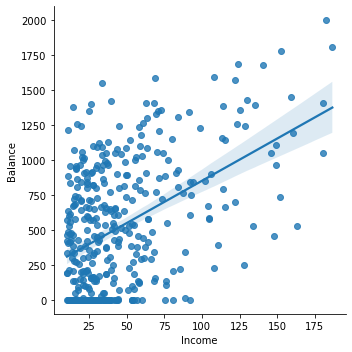

In [52]:
comportamiento1 = sns.lmplot(x="Income", y="Balance", data= df) 

## Comentarios

In [ ]:
#Existe una relación positiva. a medida que aumenta los ingresos tambien lo hace el promedio de la deuda.
#Aunque se aprecia que existe una gran dispersión de los datos.

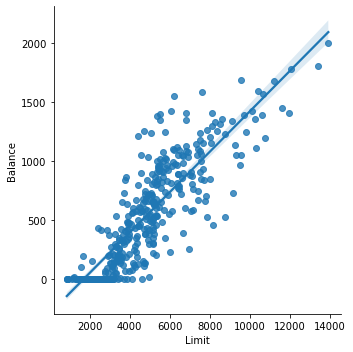

In [53]:
comportamiento2 = sns.lmplot(x="Limit", y="Balance", data= df)

## Comentarios

In [ ]:
#Existe una relación positiva. a medida que aumenta el limite de crédito tambien lo hace el promedio de la deuda.
#A diferencia de la variable analizada anteriormente existe una menor dispersión.

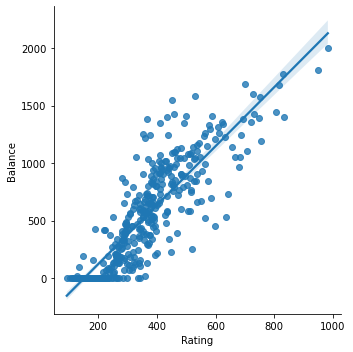

In [54]:
comportamiento3 = sns.lmplot(x="Rating", y="Balance", data= df)

## Comentarios

In [55]:
#Existe una relación positiva, a medida que aumenta el raiting tambien lo hace el promedio de la deuda.